In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Grafo Game of Thrones

In [2]:
G = nx.DiGraph()

In [3]:
G.add_node("Loras Tyrell")
G.add_node("Margaery Tyrell")
G.add_node("Cersei Lannister")
G.add_node("Robert Baratheon")
G.add_node("Jaime Lannister")
G.add_node("Tywin Lannister")
G.add_node("Varys")
G.add_node("Ned Stark")
G.add_node("Joffrey Baratheon")
G.add_node("Sandor Clegane")
G.add_node("Olenna Tyrell")
G.add_node("Tyrion Lannister")
G.add_node("Shae")
G.add_node("Ros")
G.add_node("Petyr Baelish")
G.add_node("Sansa Stark")
G.add_node("Lysa Arryn")

In [4]:
G.add_edge("Cersei Lannister", "Loras Tyrell")
G.add_edge("Cersei Lannister", "Margaery Tyrell")
G.add_edge("Cersei Lannister", "Jaime Lannister")
G.add_edge("Cersei Lannister", "Robert Baratheon")
G.add_edge("Cersei Lannister", "Tywin Lannister")
G.add_edge("Cersei Lannister", "Tyrion Lannister")
G.add_edge("Jaime Lannister", "Cersei Lannister")
G.add_edge("Jaime Lannister", "Tywin Lannister")
G.add_edge("Jaime Lannister", "Tyrion Lannister")
G.add_edge("Tyrion Lannister", "Tywin Lannister")
G.add_edge("Tyrion Lannister", "Cersei Lannister")
G.add_edge("Tyrion Lannister", "Jaime Lannister")
G.add_edge("Margaery Tyrell", "Cersei Lannister")
G.add_edge("Robert Baratheon", "Cersei Lannister")
G.add_edge("Tyrion Lannister", "Tywin Lannister")
G.add_edge("Tyrion Lannister", "Cersei Lannister")
G.add_edge("Tywin Lannister", "Jaime Lannister")
G.add_edge("Tywin Lannister", "Tyrion Lannister")
G.add_edge("Tywin Lannister", "Cersei Lannister")
G.add_edge("Varys", "Tyrion Lannister")
G.add_edge("Varys", "Cersei Lannister")
G.add_edge("Varys", "Ned Stark")
G.add_edge("Varys", "Tywin Lannister")
G.add_edge("Varys", "Joffrey Baratheon")
G.add_edge("Varys", "Petyr Baelish")
G.add_edge("Joffrey Baratheon", "Ned Stark")
G.add_edge("Sandor Clegane", "Joffrey Baratheon")
G.add_edge("Olenna Tyrell", "Joffrey Baratheon")
G.add_edge("Petyr Baelish", "Varys")
G.add_edge("Petyr Baelish", "Ned Stark")
G.add_edge("Petyr Baelish", "Ros")
G.add_edge("Petyr Baelish", "Tyrion Lannister")
G.add_edge("Petyr Baelish", "Lysa Arryn")
G.add_edge("Petyr Baelish", "Sansa Stark")
G.add_edge("Petyr Baelish", "Joffrey Baratheon")
G.add_edge("Shae", "Tyrion Lannister")
G.add_edge("Ros", "Petyr Baelish")
G.add_edge("Sansa Stark", "Petyr Baelish")
G.add_edge("Sansa Stark", "Lysa Arryn")

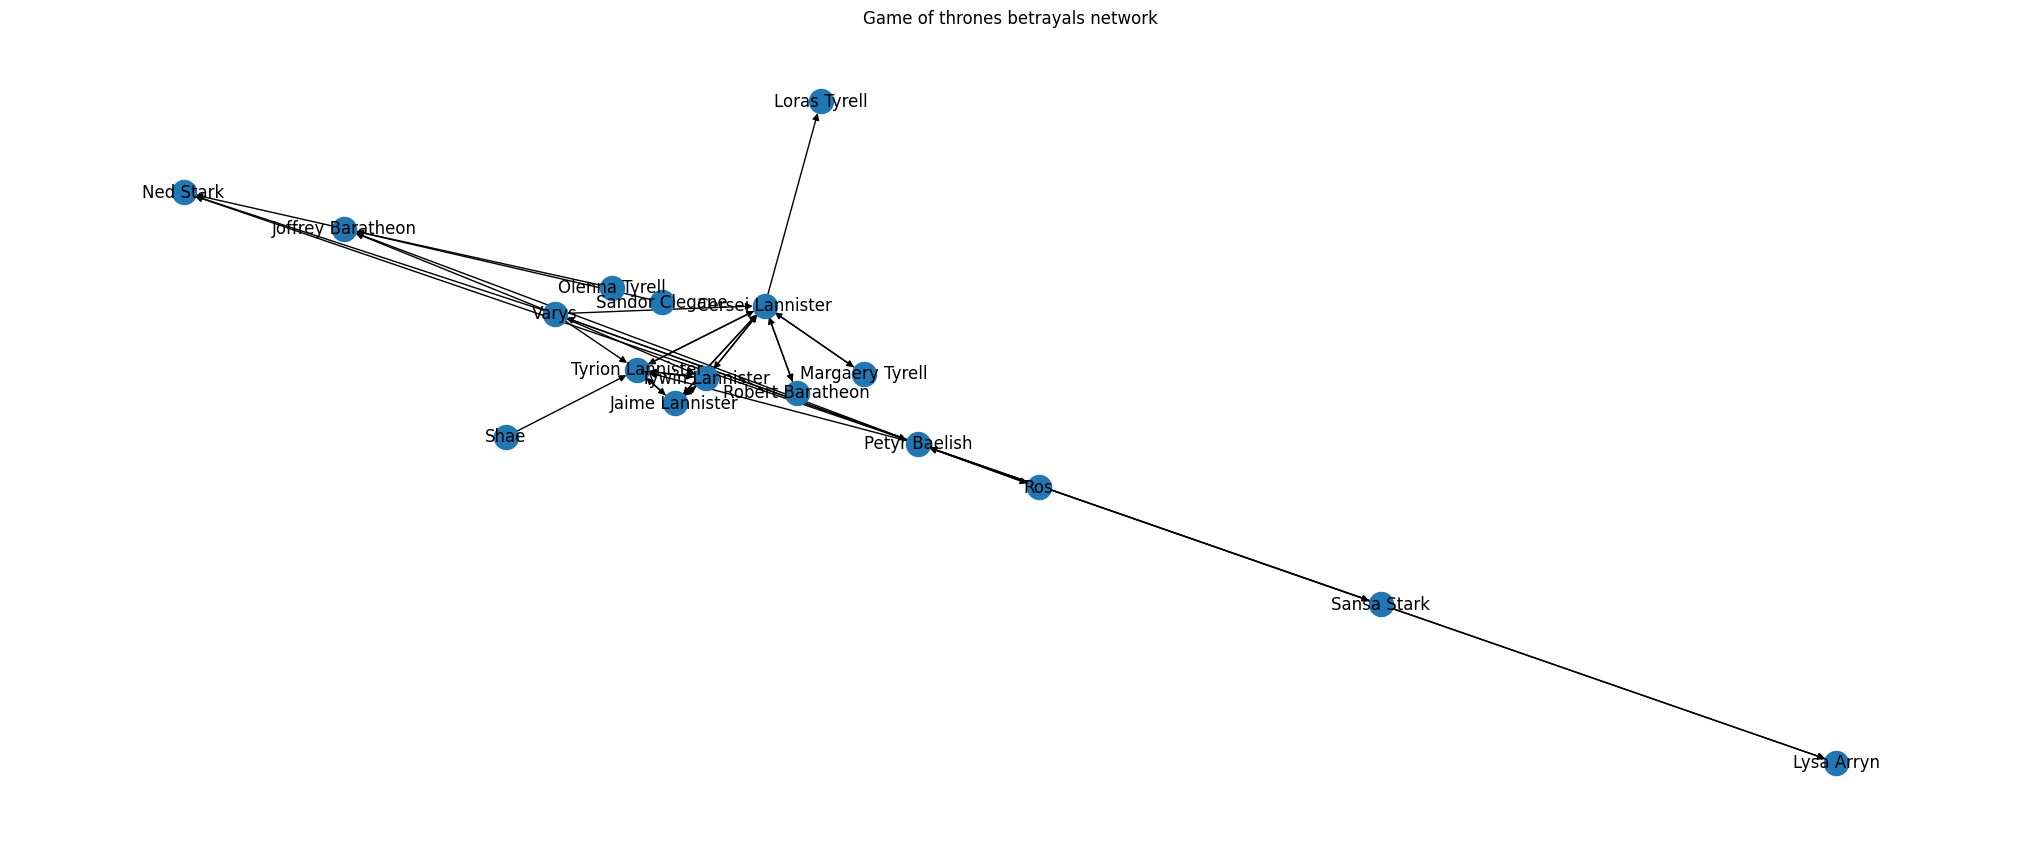

In [5]:
pos = nx.spring_layout(G)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G,pos, with_labels=True)
plt.title("Game of thrones betrayals network")
plt.show()

In [6]:
sp = dict(nx.all_pairs_shortest_path_length(G))

La medida de similitud que se usará será un tipo de diferencia, usando el promedio (ya que es dirigido, puede ser distinto el camino más corto de A a B que de B a A) de la distancia más corta entre dos nodos (si no hay una manera de llegar de un nodo a otro, se le asignará la distancia más corta más larga +1), y la presencia de un apellido o no, si dos personas tienen el mismo apellido, se le añade un 0 a su diferencia, si los dos tienen apellido (son nobles) o ninguno tiene apellido (ninguno es noble) un 1 y si uno tiene apellido y el otro no un 2, se agruparán entre menos distintos sean.

In [7]:
maxsp = 0
for i in G.nodes():
  for j in G.nodes():
    if i!=j:
      try:
        if sp[i][j] > maxsp:
          maxsp = sp[i][j]
      except:
        maxsp = maxsp
print('El camino más largo es', maxsp)

El camino más largo es 4


In [8]:
for i in G.nodes():
  for j in G.nodes():
    if i!=j:
      try:
        print(i, 'con', j, 'tiene una distancia de', sp[i][j])
      except:
        sp[i][j] = maxsp + 1
        print(i, 'con', j, 'tiene una distancia de', str(maxsp+1))

Loras Tyrell con Margaery Tyrell tiene una distancia de 5
Loras Tyrell con Cersei Lannister tiene una distancia de 5
Loras Tyrell con Robert Baratheon tiene una distancia de 5
Loras Tyrell con Jaime Lannister tiene una distancia de 5
Loras Tyrell con Tywin Lannister tiene una distancia de 5
Loras Tyrell con Varys tiene una distancia de 5
Loras Tyrell con Ned Stark tiene una distancia de 5
Loras Tyrell con Joffrey Baratheon tiene una distancia de 5
Loras Tyrell con Sandor Clegane tiene una distancia de 5
Loras Tyrell con Olenna Tyrell tiene una distancia de 5
Loras Tyrell con Tyrion Lannister tiene una distancia de 5
Loras Tyrell con Shae tiene una distancia de 5
Loras Tyrell con Ros tiene una distancia de 5
Loras Tyrell con Petyr Baelish tiene una distancia de 5
Loras Tyrell con Sansa Stark tiene una distancia de 5
Loras Tyrell con Lysa Arryn tiene una distancia de 5
Margaery Tyrell con Loras Tyrell tiene una distancia de 2
Margaery Tyrell con Cersei Lannister tiene una distancia de 1


In [9]:
data = pd.DataFrame(index = G.nodes(), columns = G.nodes())

Creamos la matriz de distancias (entre más pequeño el valor, más similares)

In [10]:
for i in G.nodes():
  for j in G.nodes():
    if i!=j:
      if len(i.split(' ')) == len(j.split(' ')):
        if len(i.split(' ')) == 2:
          if i.split(' ')[1] == j.split(' ')[1]:
            data[i][j] = (((sp[i][j]+sp[j][i])/2) + 0)
            data[j][i] = (((sp[i][j]+sp[j][i])/2) + 0)
          else:
            data[i][j] = (((sp[i][j]+sp[j][i])/2) + 1)
            data[j][i] = (((sp[i][j]+sp[j][i])/2) + 1)
        else:
          data[i][j] = (((sp[i][j]+sp[j][i])/2) + 1)
          data[j][i] = (((sp[i][j]+sp[j][i])/2) + 1)
      else:
        data[i][j] = (((sp[i][j]+sp[j][i])/2) + 2)
        data[j][i] = (((sp[i][j]+sp[j][i])/2) + 2)
    else:
        data[i][j] = 0
        data[j][i] = 0
data

,Loras Tyrell,Margaery Tyrell,Cersei Lannister,Robert Baratheon,Jaime Lannister,Tywin Lannister,Varys,Ned Stark,Joffrey Baratheon,Sandor Clegane,Olenna Tyrell,Tyrion Lannister,Shae,Ros,Petyr Baelish,Sansa Stark,Lysa Arryn
Loras Tyrell,0,3.5,4.0,4.5,4.5,4.5,5.5,6.0,6.0,6.0,5.0,4.5,6.0,6.5,5.0,5.5,6.0
Margaery Tyrell,3.5,0,2.0,3.0,3.0,3.0,5.5,6.0,6.0,6.0,5.0,3.0,6.0,6.5,5.0,5.5,6.0
Cersei Lannister,4.0,2.0,0,2.0,1.0,1.0,5.0,6.0,6.0,6.0,6.0,1.0,5.5,6.0,4.5,5.0,6.0
Robert Baratheon,4.5,3.0,2.0,0,3.0,3.0,5.5,6.0,5.0,6.0,6.0,3.0,6.0,6.5,5.0,5.5,6.0
Jaime Lannister,4.5,3.0,1.0,3.0,0,1.0,5.5,6.0,6.0,6.0,6.0,1.0,5.5,6.0,4.5,5.0,6.0
Tywin Lannister,4.5,3.0,1.0,3.0,1.0,0,5.0,6.0,6.0,6.0,6.0,1.0,5.5,6.0,4.5,5.0,6.0
Varys,5.5,5.5,5.0,5.5,5.5,5.0,0,5.0,5.0,7.0,7.0,5.0,6.0,3.0,3.0,4.0,5.5
Ned Stark,6.0,6.0,6.0,6.0,6.0,6.0,5.0,0,4.0,4.5,4.5,6.0,7.0,5.5,4.0,3.5,6.0
Joffrey Baratheon,6.0,6.0,6.0,5.0,6.0,6.0,5.0,4.0,0,4.0,4.0,6.0,7.0,5.5,4.0,4.5,6.0
Sandor Clegane,6.0,6.0,6.0,6.0,6.0,6.0,7.0,4.5,4.0,0,6.0,6.0,7.0,7.0,6.0,6.0,6.0


In [11]:
#Se usa el argumento "precomputed" debido a que es una matriz de distancias
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='precomputed', linkage='average')
labels = hierarchical_cluster.fit_predict(data)

In [12]:
node_names = list(G.nodes())
for group, name in zip(labels, node_names):
    print(f"{name} is in group {group}")

Loras Tyrell is in group 1
Margaery Tyrell is in group 1
Cersei Lannister is in group 1
Robert Baratheon is in group 1
Jaime Lannister is in group 1
Tywin Lannister is in group 1
Varys is in group 2
Ned Stark is in group 0
Joffrey Baratheon is in group 0
Sandor Clegane is in group 0
Olenna Tyrell is in group 0
Tyrion Lannister is in group 1
Shae is in group 3
Ros is in group 2
Petyr Baelish is in group 2
Sansa Stark is in group 2
Lysa Arryn is in group 2


La medida de similitud ya fue expuesta anteriormente, se decidió utilizar el estatus de nobleza y si estaban relacionados o no junto con su distancia más corta en el grafo, esto para usar un promedio de qué tan cercanos están en su entorno (debido a que incluso entre familias se traicionan, y cuando se está en el mismo lugar probablemente haya algún camino entre ambos por traiciones).

Los agrupamientos parecen haber puesto a la gente noble de king's landing que traiciona en un grupo (el 1), a los espías/traidores en otro (el 2), a las personas que sufren muchas traiciones en otro (0) y a Shae por sí sola en otro (3).

La diferencia entre el agrupamiento espectral y este es que en este parece estar mejor definida la separación, hay muchos en el grupo 1 debido a que en la serie esas personas conviven mucho y hacen bastantes planes para ganar poder abiertamente, en el grupo 2 hay más personas que lo hacen de manera oculta, en el 0 parecen estar aquellos que no están muy interesados en el poder, ya sea porque ya lo tienen (Joffrey y Olenna) o genuinamente no les interesa (Ned y Sandor) y el grupo 3 parece estar Shae sola porque ella no aplica a ninguno de esos otros 3 grupos.

# Grafo internet
Este grafo es "Zachary's karate club: social network of friendships between 34 members of a karate club at a US university in the 1970s. Please cite W. W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977)." del link http://www-personal.umich.edu/~mejn/netdata/

In [13]:
G2 = nx.read_gml('karate.gml', label = None)

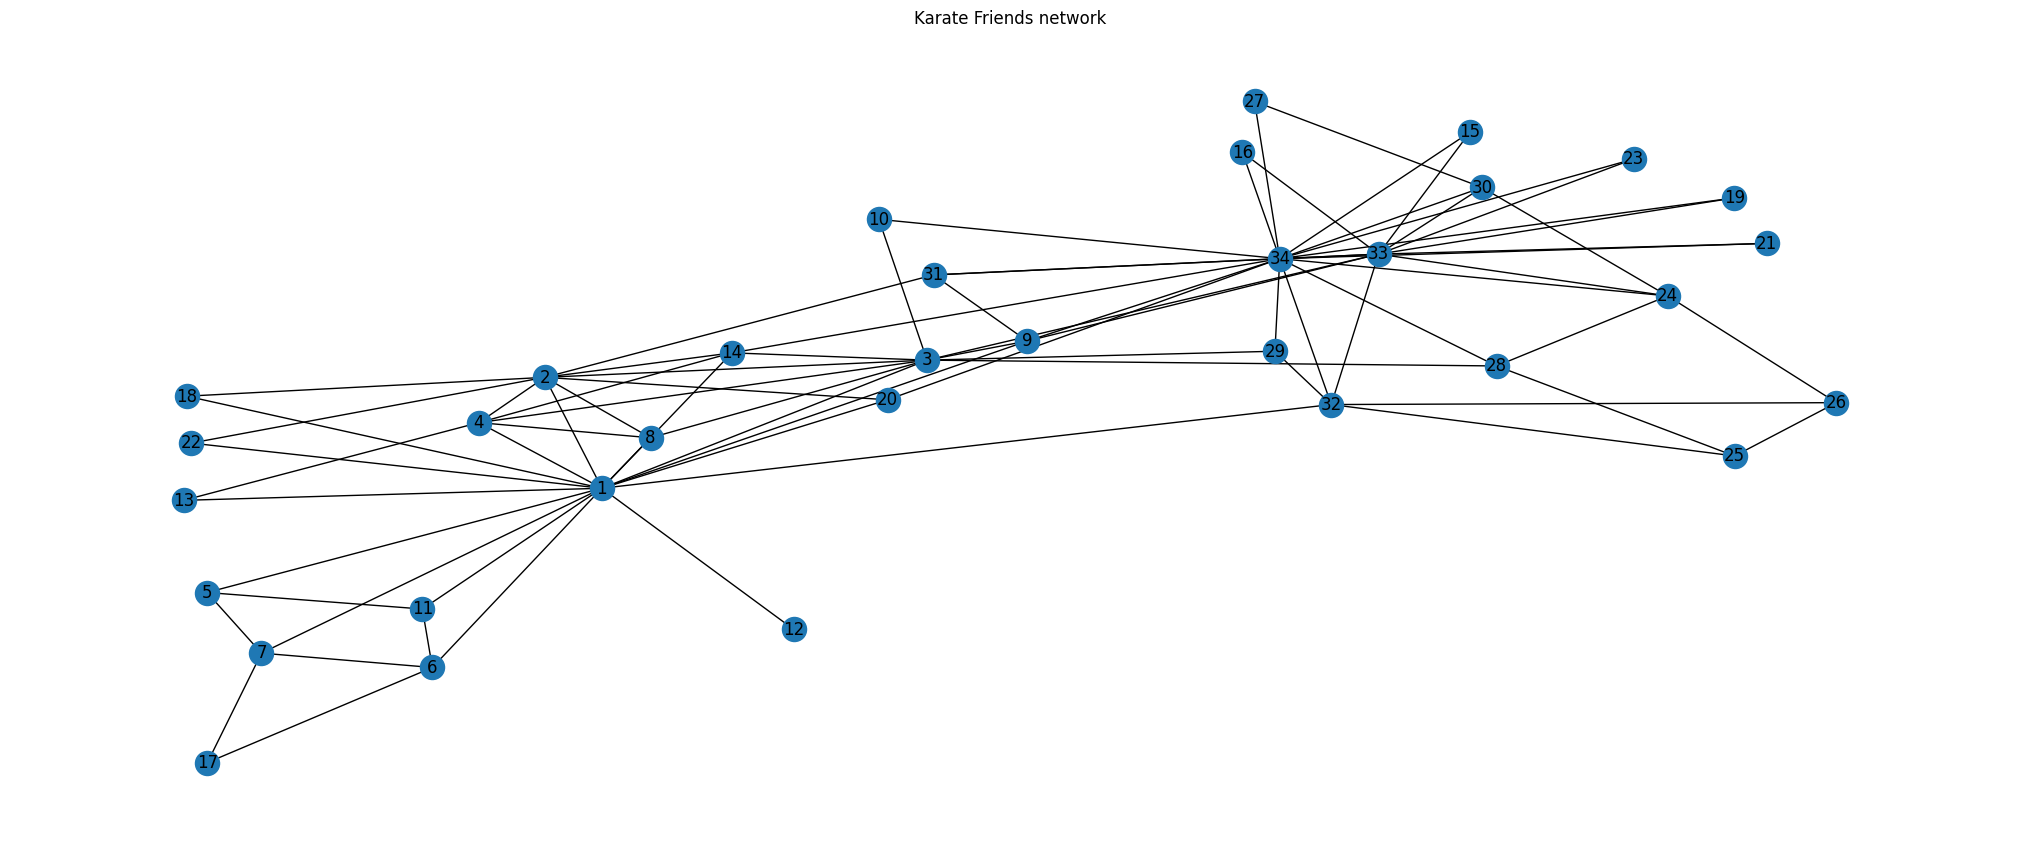

In [14]:
pos = nx.spring_layout(G2)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G2,pos, with_labels=True)
plt.title("Karate Friends network")
plt.show()

La medida de similitud que usaremos en este caso será la distancia más corta entre dos nodos.

In [15]:
sp2 = dict(nx.all_pairs_shortest_path_length(G2))

In [16]:
data2 = pd.DataFrame(index = G2.nodes(), columns = G2.nodes())

In [17]:
for i in G2.nodes():
  for j in G2.nodes():
    if i!=j:
        data2[i][j] = sp2[i][j]
        data2[j][i] = sp2[j][i]
    else:
        data2[i][j] = 0
        data2[j][i] = 0
data2

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,0,1,1,1,1,1,1,1,1,2,...,2,2,3,2,2,3,2,1,2,2
2,1,0,1,1,2,2,2,1,2,2,...,3,3,3,2,2,3,1,2,2,2
3,1,1,0,1,2,2,2,1,1,1,...,2,3,3,1,1,2,2,2,1,2
4,1,1,1,0,2,2,2,1,2,2,...,3,3,3,2,2,3,2,2,2,2
5,1,2,2,2,0,2,1,2,2,3,...,3,3,4,3,3,4,3,2,3,3
6,1,2,2,2,2,0,1,2,2,3,...,3,3,4,3,3,4,3,2,3,3
7,1,2,2,2,1,1,0,2,2,3,...,3,3,4,3,3,4,3,2,3,3
8,1,1,1,1,2,2,2,0,2,2,...,3,3,4,2,2,3,2,2,2,3
9,1,2,1,2,2,2,2,2,0,2,...,3,3,2,2,2,2,1,2,1,1
10,2,2,1,2,3,3,3,2,2,0,...,3,3,2,2,2,2,2,2,2,1


In [18]:
#Se usa el argumento "precomputed" debido a que es una matriz de distancias
hierarchical_cluster2 = AgglomerativeClustering(n_clusters=4, metric='precomputed', linkage='average')
labels2 = hierarchical_cluster2.fit_predict(data2)

In [19]:
node_names2 = list(G2.nodes())
for group, name in zip(labels2, node_names2):
    print(f"{name} is in group {group}")

1 is in group 1
2 is in group 1
3 is in group 1
4 is in group 1
5 is in group 3
6 is in group 3
7 is in group 3
8 is in group 1
9 is in group 0
10 is in group 0
11 is in group 3
12 is in group 1
13 is in group 1
14 is in group 0
15 is in group 0
16 is in group 0
17 is in group 3
18 is in group 1
19 is in group 0
20 is in group 0
21 is in group 0
22 is in group 1
23 is in group 0
24 is in group 2
25 is in group 2
26 is in group 2
27 is in group 0
28 is in group 2
29 is in group 2
30 is in group 0
31 is in group 0
32 is in group 2
33 is in group 0
34 is in group 0


La medida de similitud que se eligió fue la distancia más corta en el grafo, si A y B se llevan con C, es probable que A y B también sean similares, ya que tienen amigos similares.

Parece haber dividido también de una manera bastante equitativa, el grupo 0 es bastante grande, probablemente un gran grupo de amigos, el 1 es bastante pequeño, probablemente consista de un grupito de amigos que todos se llevan solo entre ellos, el 2 es aún más pequeño, por lo que probablemente sea similar al 1 pero no se lleven entre ellos, lo mismo pasa con el 3.

El agrupamiento en comparación al espectral es similar, sin embargo, sí hay algunas diferencias, el espectral parece haber dividido más equitativamente los grupos, el jerárquico agrupó a un grupo con bastante gente (el 0).